# Sales Prediction
### Name: Bhushan Sonawane
### Newbieron Technology

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:\\Users\\dell\\Desktop\\Train.csv")

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.Item_Identifier.nunique()

1559

In [5]:
unique_item_identifier = data.Item_Identifier.str[:3].unique()

In [6]:
unique_item_identifier

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

#### Item Identifier column
#### FD - represents food
#### DR - represents drinks
#### NC - represents non-consumables

In [7]:
data.shape

(8523, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# Listing Categorical and Numerical features seperately
categorical_features = data.select_dtypes(include=['object']).columns.to_list()
numerical_features = data.select_dtypes(exclude=['object']).columns.to_list()

print("Cateforical Features: ",categorical_features)
print("Numerical Features: ", numerical_features)

Cateforical Features:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Features:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#For missing values we will impute mean for item weight and mode for outlet size
data.Item_Weight.mean()

12.857645184136183

In [12]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [13]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
mode_of_outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))

In [15]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
missing_values = data.Outlet_Size.isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [17]:
data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [18]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Data Analysis

In [19]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
sns.set()

#### Data Visualization

In [21]:
numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

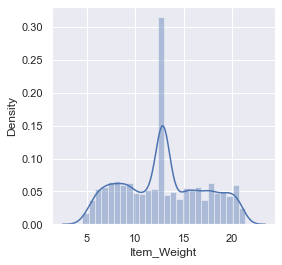

In [22]:
plt.figure(figsize=(4,4))
sns.distplot(data.Item_Weight)
plt.show()

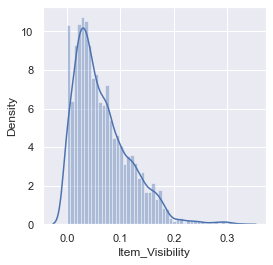

In [23]:
plt.figure(figsize=(4,4))
sns.distplot(data.Item_Visibility)
plt.show()

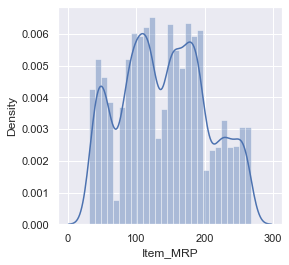

In [24]:
plt.figure(figsize=(4,4))
sns.distplot(data.Item_MRP)
plt.show()

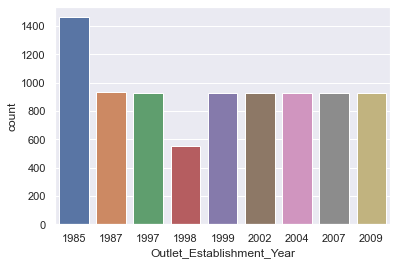

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x=data.Outlet_Establishment_Year)
plt.show()

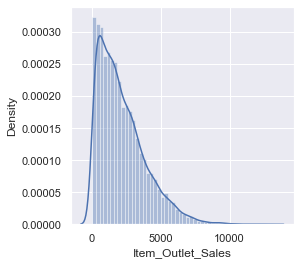

In [26]:
plt.figure(figsize=(4,4))
sns.distplot(data.Item_Outlet_Sales)
plt.show()

In [27]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

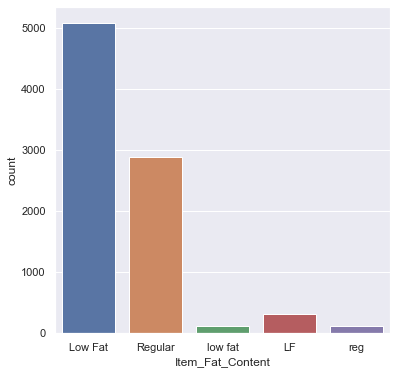

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x=data.Item_Fat_Content)
plt.show()

In [29]:
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [30]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(
    {
        'low fat' : 'Low Fat',
        'LF' : 'Low Fat',
        'reg' : 'Regular'
    })

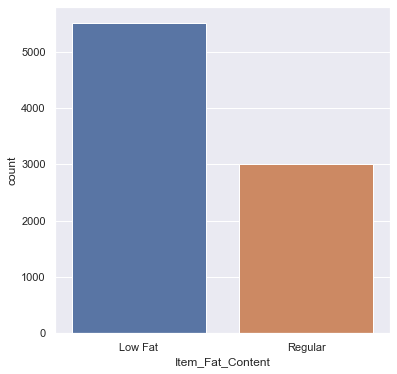

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x=data.Item_Fat_Content)
plt.show()

In [32]:
item_type_count = data['Item_Type'].value_counts().sort_values(ascending=False)

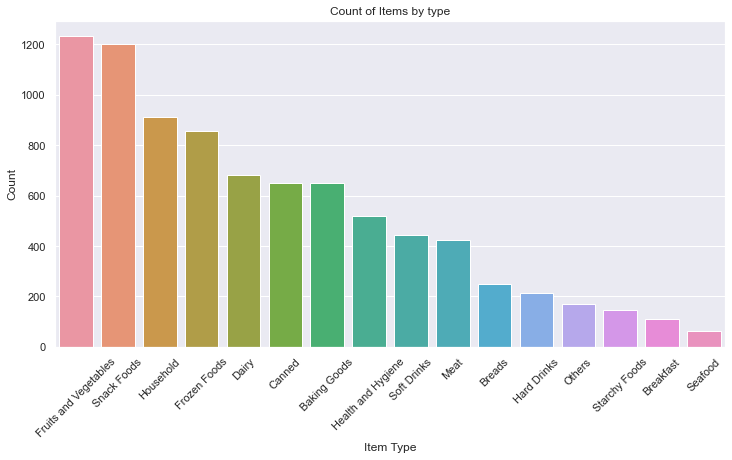

In [33]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=data, x='Item_Type', order=item_type_count.index)
plt.xticks(rotation=45)
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Count of Items by type')
plt.show()

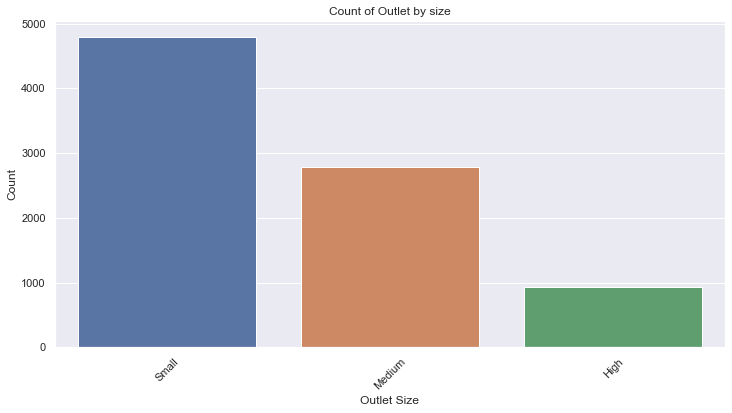

In [34]:
outlet_size_count = data['Outlet_Size'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = sns.countplot(data=data, x='Outlet_Size', order=outlet_size_count.index)
plt.xticks(rotation=45)
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Count of Outlet by size')
plt.show()

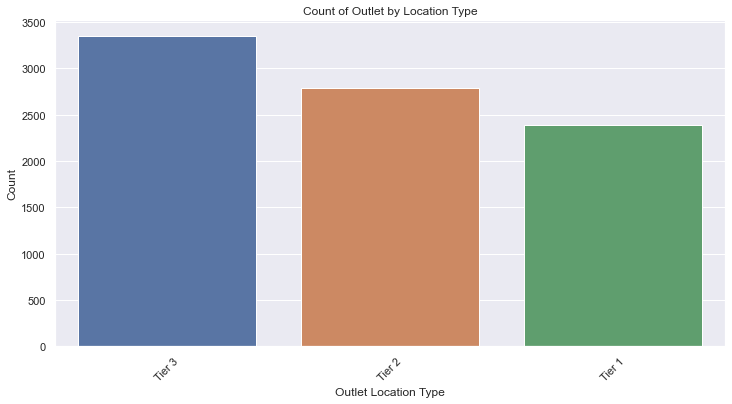

In [35]:
outlet_location_type_count = data['Outlet_Location_Type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = sns.countplot(data=data, x='Outlet_Location_Type', order=outlet_location_type_count.index)
plt.xticks(rotation=45)
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Count of Outlet by Location Type')
plt.show()

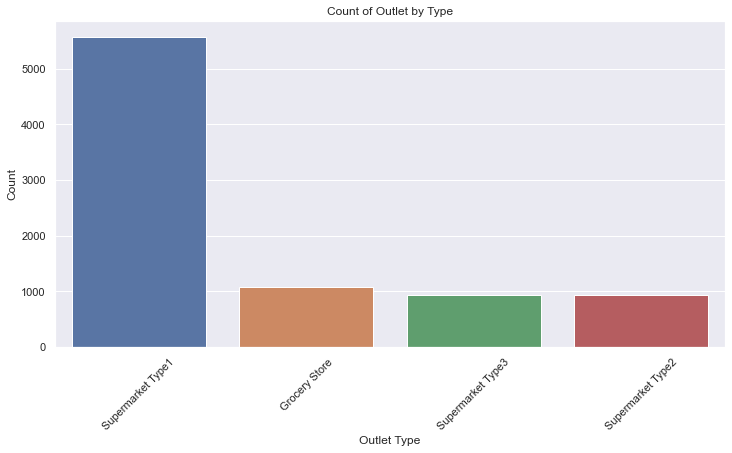

In [36]:
outlet_type_count = data['Outlet_Type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = sns.countplot(data=data, x='Outlet_Type', order=outlet_type_count.index)
plt.xticks(rotation=45)
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.title('Count of Outlet by Type')
plt.show()

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
encoder = LabelEncoder()

In [52]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [53]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,2,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,2,1,1,4710.5350


In [54]:
X = data.drop(columns='Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']
print('X:',X)
print('Y:',y)

X:       Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [56]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6818, 11) (1705, 11) (6818,) (1705,)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = LR.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression:")
print("Mean Squared Error: ", mse)
print("R-squared: ",r2)

Linear Regression:
Mean Squared Error:  1577094.25267757
R-squared:  0.48912987193626367


In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression:")
print("Mean Squared Error: ", mse_rf)
print("R-squared: ",r2_rf)

Random Forest Regression:
Mean Squared Error:  1382401.5273039395
R-squared:  0.5521969317368038
